In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

In [0]:
import tensorflow as tf
from tensorflow import keras
import glob

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.2.0-rc1'

In [5]:
from tensorflow.keras.utils import get_file
tf.keras.utils.get_file(
    '/content/cats_and_dogs_filtered.zip', 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip', untar=False, md5_hash=None, file_hash=None,
    cache_subdir='datasets', hash_algorithm='auto', extract=True,
    archive_format='auto', cache_dir=None
)

68608000/68606236 [==============================] - 1s 0us/step


'/content/cats_and_dogs_filtered.zip'

In [6]:
!unzip /content/cats_and_dogs_filtered.zip

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

In [0]:
#train data read
cat_fname_lst_train=glob.glob('/content/cats_and_dogs_filtered/train/cats/*.jpg')
dog_fname_lst_train=glob.glob('/content/cats_and_dogs_filtered/train/dogs/*.jpg')

#validation data read
cat_vali_lst=glob.glob('/content/cats_and_dogs_filtered/validation/cats/*jpg')
dog_vali_lst=glob.glob('/content/cats_and_dogs_filtered/validation/dogs/*jpg')

In [8]:
print('No of training cat images:',len(cat_fname_lst_train))
print('No of training dog images:',len(dog_fname_lst_train))
print()
print('No of validation cat images:',len(cat_vali_lst))
print('No of validation dog images:',len(dog_vali_lst))
print()
print('Total No of Training Images:',len(cat_fname_lst_train)+len(dog_fname_lst_train))
print('Total No of Validation Images:',len(cat_vali_lst)+len(dog_vali_lst))

No of training cat images: 1000
No of training dog images: 1000

No of validation cat images: 500
No of validation dog images: 500

Total No of Training Images: 2000
Total No of Validation Images: 1000


In [0]:
train_dir = os.path.join('/content/cats_and_dogs_filtered', 'train')
validation_dir = os.path.join('/content/cats_and_dogs_filtered', 'validation')

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        rotation_range=45,
        width_shift_range=0.1,
        height_shift_range=0.1,
        fill_mode='nearest'
        ) 
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [12]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [13]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [0]:
sample_training_images, _ = next(train_data_gen)

In [0]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

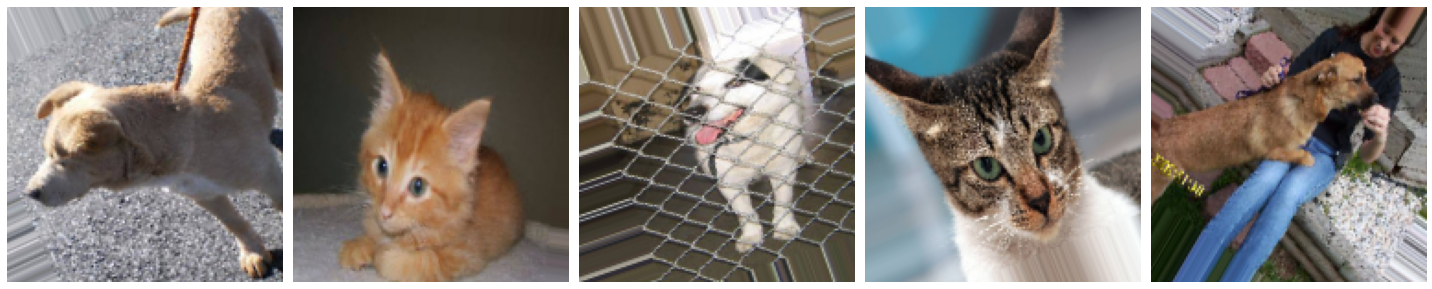

In [16]:
plotImages(sample_training_images[:5])

In [0]:
model = Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(64, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [0]:
from tensorflow.keras.optimizers import RMSprop, Adam, SGD, Adagrad, Adadelta

In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

In [0]:
callbacks=EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',mode='max', verbose=1, save_best_only=True)

In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=128,
    epochs=12,
    callbacks=[mc,callbacks],
    validation_data=val_data_gen,
    validation_steps=50
)

Epoch 1/12
128/128 [==============================] - ETA: 0s - loss: 0.3051 - accuracy: 0.8693
Epoch 00001: val_accuracy improved from 0.79652 to 0.80323, saving model to best_model.h5
128/128 [==============================] - 129s 1s/step - loss: 0.3051 - accuracy: 0.8693 - val_loss: 0.4568 - val_accuracy: 0.8032
Epoch 2/12
128/128 [==============================] - ETA: 0s - loss: 0.3013 - accuracy: 0.8676
Epoch 00002: val_accuracy did not improve from 0.80323
128/128 [==============================] - 128s 998ms/step - loss: 0.3013 - accuracy: 0.8676 - val_loss: 0.5811 - val_accuracy: 0.7756
Epoch 3/12
128/128 [==============================] - ETA: 0s - loss: 0.2790 - accuracy: 0.8801
Epoch 00003: val_accuracy improved from 0.80323 to 0.81410, saving model to best_model.h5
128/128 [==============================] - 127s 995ms/step - loss: 0.2790 - accuracy: 0.8801 - val_loss: 0.4917 - val_accuracy: 0.8141
Epoch 4/12
128/128 [==============================] - ETA: 0s - loss: 0.260

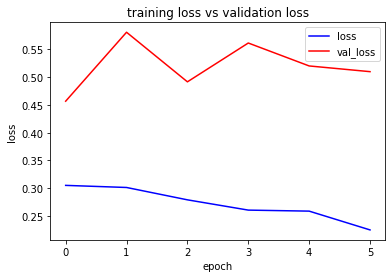

In [29]:
plt.plot(history.history['loss'],'b',label='loss')
plt.plot(history.history['val_loss'],'r',label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss vs validation loss')
plt.legend()

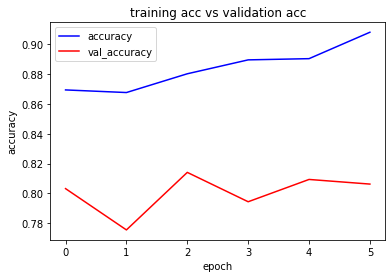

In [30]:
plt.plot(history.history['accuracy'],'b',label='accuracy')
plt.plot(history.history['val_accuracy'],'r',label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('training acc vs validation acc')
plt.legend()

In [31]:
model.save('/content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /models/sample_data/my_model6_30 epoch_78') 

INFO:tensorflow:Assets written to: /content/drive/My Drive/datasets/Tensorflow  community challenge /Datasets /models/sample_data/my_model6_30 epoch_78/assets
